In [109]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import math
import pandas as pd

# Herramientas de graficado

In [110]:
def searchSpace(objective,dsignParms):
  if len(dsignParms)==1:
    x = np.linspace(dsignParms[0][0], dsignParms[0][1], 30)
    z=np.zeros(x.shape)
    for index,value in enumerate(x):
      #Se agrega un caso para el valor 0 que causa problemas de division entre 0 para algunas versiones de python
      if not (value==0.0):
        z[index]=objective([value])
      else:
        z[index]=0
    fig=plt.figure()  
    axes=fig.add_axes([0.1,0.1,0.8,0.8])
    axes.plot(x,z) 
    
  if len(dsignParms)==2:
    x = np.linspace(dsignParms[0][0], dsignParms[0][1], 30)
    y = np.linspace(dsignParms[1][0], dsignParms[1][1], 30)
    xv,yv = np.meshgrid(x, y)
  
    mi,mj=xv.shape
    z=np.zeros(xv.shape)
    for i in range(mi):
      for j in range(mj):
        z[i,j]=objective([xv[i,j],yv[i,j]])
    
    fig=plt.figure()  
    axes=Axes3D(fig)
    surf = axes.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  return fig,axes

In [111]:
def solutionPrint(objective,fig, axes, Historic):
  if len(Historic[0])==1:
    x=list()
    z=list()
    for data in Historic: 
      z.append(objective(data))
      x.append(data)
    axes.plot(x,z,c='r',marker='h') 
    plt.show()
  if len(Historic[0])==2:
    x=list()
    y=list()
    z=list()
    for data in Historic:
      z.append(objective(data))
      x.append(data[0])
      y.append(data[1])
    #print(axes)
    axes.plot(x,y,z,c='r',marker='h') 
    
    plt.show()

In [112]:
def GrafHist(histObje):
  fig=plt.figure()  
  axes=fig.add_axes([0.1,0.1,0.8,0.8])
  axes.plot(histObje) 
  plt.show()

# Algoritmos de Optimización


# Evolución diferencial

Se ha implementado el siguiente codigo con apoyo del siguiente tutorial:

https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/

En él se explica el uso del algoritmo y sus componentes.

In [113]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000, maxim=False):
  #Dimensiones de la funcion
  dimensions = len(bounds)
  #Tamaños de población
  pop = np.random.rand(popsize, dimensions)
  #limites
  min_b, max_b = np.asarray(bounds).T
  #Calcula diferencia de 
  diff = np.fabs(min_b - max_b)  
  pop_denorm = min_b + pop * diff
  #calculo de fintess de toda la poblacion
  fitness = np.asarray([fobj(ind) for ind in pop_denorm])
  #Obtenemos el mejor valor de fitness
  best_idx = np.argmin(fitness)
  best = pop_denorm[best_idx]
  for i in range(its):
      for j in range(popsize):          
          idxs = [idx for idx in range(popsize) if idx != j]
          #obtenemos 3 datos al azar de la poblacion
          a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
          #Mutamos
          mutant = np.clip(a + mut * (b - c), 0, 1)
          #Cruzamos
          cross_points = np.random.rand(dimensions) < crossp
          if not np.any(cross_points):
              cross_points[np.random.randint(0, dimensions)] = True
          #Numero de pruebas
          trial = np.where(cross_points, mutant, pop[j])
          trial_denorm = min_b + trial * diff
          f = fobj(trial_denorm)
          #caso maximizacion
          if (maxim):
            if f > fitness[j]:
                fitness[j] = f              
                pop[j] = trial
                if f > fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
          #caso minimizacion
          else: 
            if f < fitness[j]:
                fitness[j] = f              
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm                  
      yield best, fitness[best_idx]

## Problema del área mínima de una caja de volumen fijo DE

In [114]:
def prob_caja_volumen_restringido(Parametros):
  '''Este modelo calcula el área de un prisma cuadrado con un volumen fijo 
  de 216 milímetros '''
  #definición de los objetivos
  x=Symbol('x')
  A=(864.0/x)+x**2.0
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [115]:
prob_caja_volumen_restringido([0])

zoo

In [116]:
it = list(de(lambda x: (864/x)+x**2, bounds=[(-1000, 1000)], its=100))
for i in it:
    print(i)

(array([48.24638421]), array([-7.59982437e+15]))
(array([-22.35196192]), array([-7.59982437e+15]))
(array([15.21480742]), array([-7.59982437e+15]))
(array([8.24623938]), array([-7.59982437e+15]))
(array([8.24623938]), array([-7.59982437e+15]))
(array([-0.7367865]), array([-7.59982437e+15]))
(array([-0.64714139]), array([-7.59982437e+15]))
(array([-0.64714139]), array([-7.59982437e+15]))
(array([-0.64714139]), array([-7.59982437e+15]))
(array([-0.12567145]), array([-7.59982437e+15]))
(array([-0.12567145]), array([-7.59982437e+15]))
(array([-0.12567145]), array([-7.59982437e+15]))
(array([-0.12567145]), array([-7.59982437e+15]))
(array([-0.00576301]), array([-7.59982437e+15]))
(array([-0.00576301]), array([-7.59982437e+15]))
(array([-0.00494868]), array([-7.59982437e+15]))
(array([-0.00391422]), array([-7.59982437e+15]))
(array([-0.00391422]), array([-7.59982437e+15]))
(array([-0.00203041]), array([-7.59982437e+15]))
(array([-0.00203041]), array([-7.59982437e+15]))
(array([-0.00203041]),

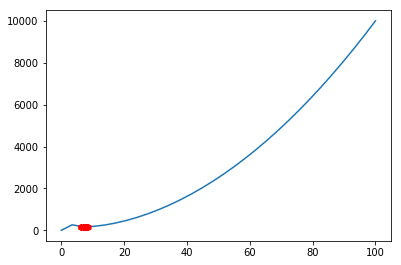

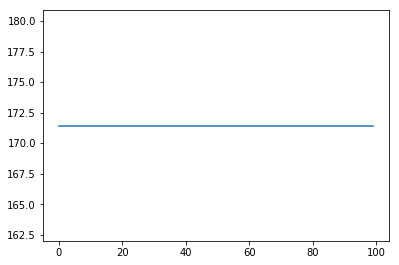

In [117]:
it = list(de(lambda x: (864/x)+x**2, bounds=[(0, 100)], its=100))
fig,axes=searchSpace(prob_caja_volumen_restringido,[[0,100]])

listobj=list()
listHist=list()

for i in it:
    listobj.append(i[0])
    listHist.append(i[1])

solutionPrint(prob_caja_volumen_restringido,fig, axes, listobj)
GrafHist(listHist)

## Plan de inversión DE

In [118]:
def planDeInversion(Parametros):
  '''Este modelo cálcula el retorno de un plan de inversión'''
  x=Symbol('x')
  A=(-(.001*x**2)) + (0.4*x) + (3.5) 
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [119]:
planDeInversion([200])

43.5000000000000

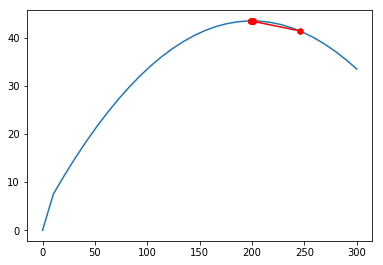

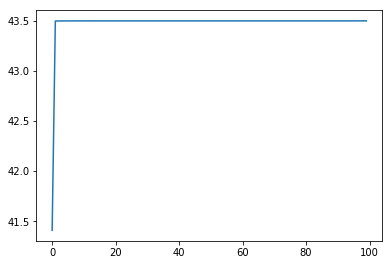

In [120]:
it = list(de (planDeInversion, bounds=[(0, 300)], its=100, maxim=True))
fig,axes=searchSpace(planDeInversion,[[0,300]])

listobj=list()
listHist=list()

for i in it:
    listobj.append(i[0])
    listHist.append(i[1])

solutionPrint(planDeInversion,fig, axes, listobj)
GrafHist(listHist)

## Cuadrados DE

In [121]:
def cuadrados(Parametros):
  '''Este modelo cálcula el área de un cuadrado tomando como base un hilo de 140cm'''

  x=Symbol('x')
  A=(((7)*(x**2))-(420*x)+9800)/8
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [122]:
cuadrados([28])

441

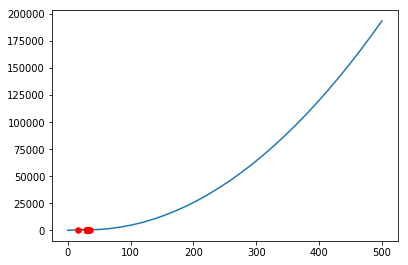

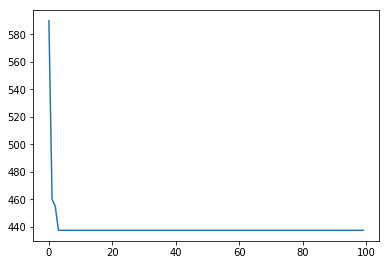

In [123]:
it = list(de (cuadrados, bounds=[(0, 500)], its=100))
fig,axes=searchSpace(cuadrados,[[0,500]])

listobj=list()
listHist=list()

for i in it:
    listobj.append(i[0])
    listHist.append(i[1])

solutionPrint(cuadrados,fig, axes, listobj)
GrafHist(listHist)

## Canaleta DE

In [124]:
def canaleta(Parametros):
  '''Este modelo el área de una canaleta con una lamina de 30 cm como base'''

  x=Symbol('x')
  A=(5*(20+20*cos(x))*sin(x))
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [125]:
canaleta([math.pi/3])

129.903810567666

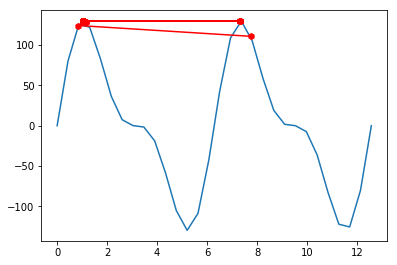

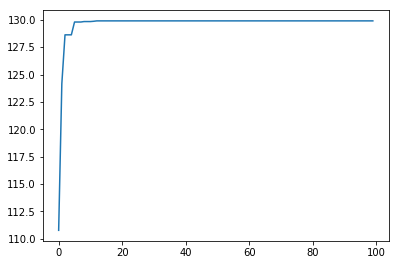

In [126]:
it = list(de (canaleta, bounds=[(0, 4*math.pi)], its=100, maxim=True))
fig,axes=searchSpace(canaleta,[[0,4*math.pi]])

listobj=list()
listHist=list()

for i in it:
    listobj.append(i[0])
    listHist.append(i[1])

solutionPrint(canaleta,fig, axes, listobj)
GrafHist(listHist)